In [1]:
# import helper methods
from exoplanetarchivefigs.exoplanetarchivefigs import get_data, mass_sma_plot

In [2]:
# set up plotting
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16}) # set larger font size for appearance 
%matplotlib widget

In [3]:
# grab all current data from the exoplanet archive
# Note that this will cache a copy of the data on your local system.  
# To refresh the cache, use keyword forceNew = True
data = get_data()

Loaded data from /Users/ds264/.EXOSIMS/downloads/exoplanetArchivePSCP_20230924141505.pkl
Loaded data from /Users/ds264/.EXOSIMS/downloads/exoplanetArchiveSpectra_20230925175537.pkl


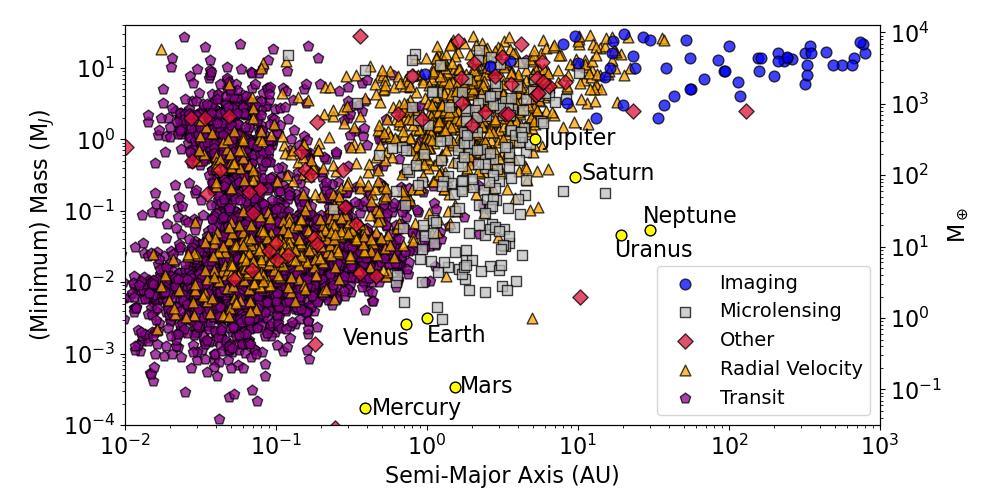

In [4]:
# create a plot of all currently known exoplanets:
mass_sma_plot(data)
# note: depending on your browser window size/resolution/etc, you may experience some cropping
# to fix, use the plt.subplots_adjust() method

In [5]:
# Let's recreate Figure 2.5 from Astro2020
# Note that our figures may not be exactly one-to-one with those in the report, 
# as the backend data may have changed slightly since those were generated.
# we still expect them to be fairly close

data2020 = data.loc[data['disc_year'] <= 2020] # drop everything discovered after 2020
# also toggle off photometry flag for anything with a first spectral measurement after 2020:
data2020.loc[data2020['first_photometry_year'] > 2020,'has_photometry'] = False

data2010 = data.loc[data['disc_year'] <= 2010] # drop everything discovered after 2010
# also toggle off photometry flag for anything with a first spectral measurement after 2010:
data2010.loc[data2010['first_photometry_year'] > 2010,'has_photometry'] = False

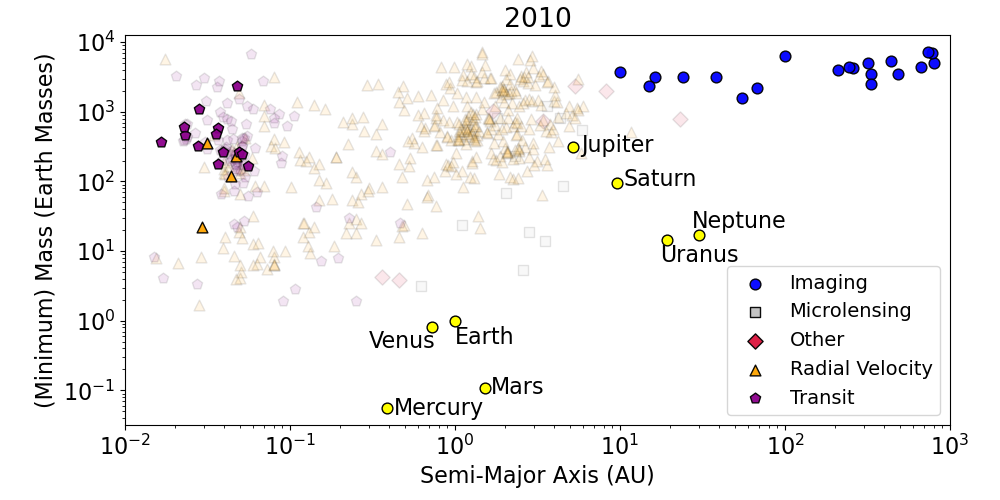

In [6]:
# top panel of fig 2.5:
mass_sma_plot(data2010,photom=True,earthmassonly=True, title="2010")

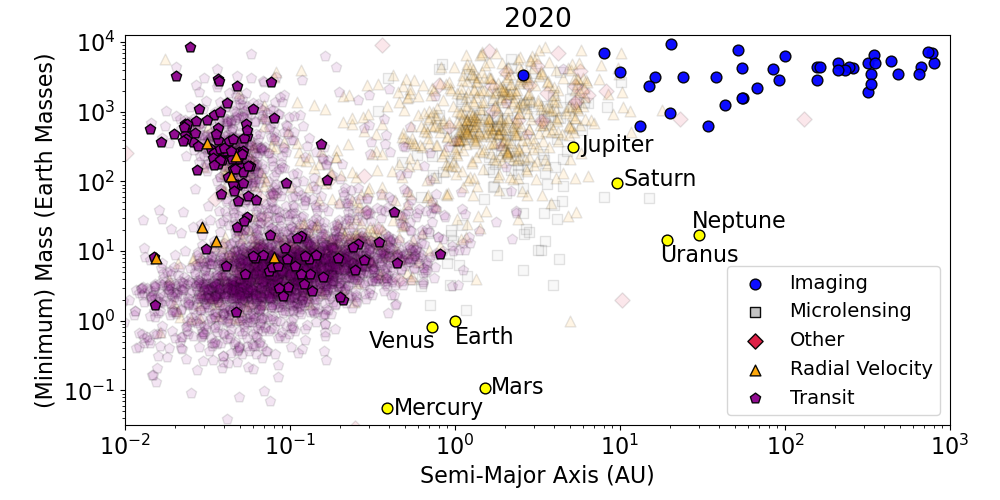

In [7]:
# bottom panel of fig 2.5:
mass_sma_plot(data2020,photom=True,earthmassonly=True, title="2020")

In [8]:
# finally, an example, with all of the methods separated out:
data2 = get_data(min_num_discoveries=0)

Loaded data from /Users/ds264/.EXOSIMS/downloads/exoplanetArchivePSCP_20230924141505.pkl
Loaded data from /Users/ds264/.EXOSIMS/downloads/exoplanetArchiveSpectra_20230925175537.pkl


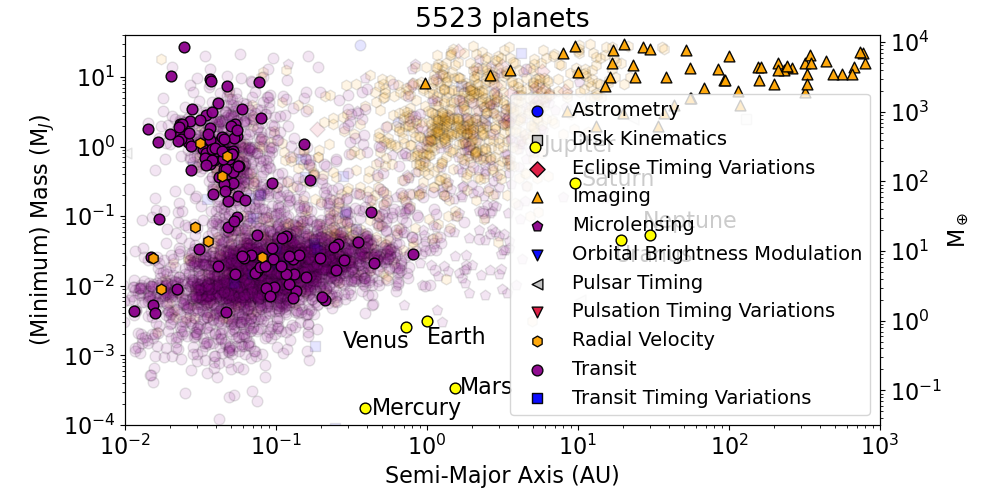

In [9]:
mass_sma_plot(data2,photom=True, title=f"{len(data2)} planets")

In [10]:
# the legend is huge, so let's manually move it outside the figure
# first find the legend handle
for ax in plt.gcf().get_children():
    l = ax.get_legend() if isinstance(ax, matplotlib.axes.Axes) else None
    if l is not None: break
# now resize the plot and move the legend
plt.subplots_adjust(right=0.5)
l.set_bbox_to_anchor((2.25,0.1))